In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota2=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
toyota3=toyota2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota3


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota3[toyota3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
toyota3.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
toyota4=toyota3.drop_duplicates()

In [12]:
toyota4.shape

(1435, 9)

In [13]:
toyota4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [14]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit()

In [15]:
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [19]:
model1.pvalues.round(5)           #  at 95 % significance CC and Doors does not effect the Price

Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64

In [21]:
model_CC=smf.ols('Price~CC',data=toyota4).fit()

In [22]:
model_CC.pvalues            # this shows cc is a significant factor

Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64

In [23]:
model_Doors=smf.ols('Price~Doors',data=toyota4).fit()

In [24]:
model_Doors.pvalues               # doors is also significant

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [29]:
model_cc_doors=smf.ols('Price~Doors+CC',data=toyota4).fit()

In [30]:
model_cc_doors.pvalues

Intercept    1.580945e-35
Doors        2.109558e-11
CC           2.101878e-05
dtype: float64

In [31]:
# calculating VIF to check multicollinearity problem

In [32]:
def vif(x):
    k=1/(1-x)                            #x is R2 values
    return k

In [37]:
Age_r2=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif(Age_r2)

1.8762358497682887

In [38]:
KM_R2=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif(KM_R2)

1.7571780239810404

In [39]:
HP_R2=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif(HP_R2)

1.4191801087182139

In [40]:
R2_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared

In [41]:
vif(R2_CC)

1.1634703645940863

In [42]:
R2_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota4).fit().rsquared
vif(R2_Doors)

1.1558898658142074

In [43]:
R2_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota4).fit().rsquared
vif(R2_Gears)

1.0988429081631146

In [44]:
R2_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota4).fit().rsquared
vif(R2_QT)

2.2953745089857147

In [45]:
R2_Weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota4).fit().rsquared
vif(R2_Weight)

2.4871800071791847

In [47]:
#   none of vif is greater than 20. so no multicollineairty, so we go with model1

In [48]:
# model deletion diagnostics

In [50]:
outliers=model1.get_influence()

In [54]:
cooks,dffits=outliers.cooks_distance

In [56]:
cooks.round(4)

array([0.0072, 0.0039, 0.0054, ..., 0.    , 0.0007, 0.0108])

<StemContainer object of 3 artists>

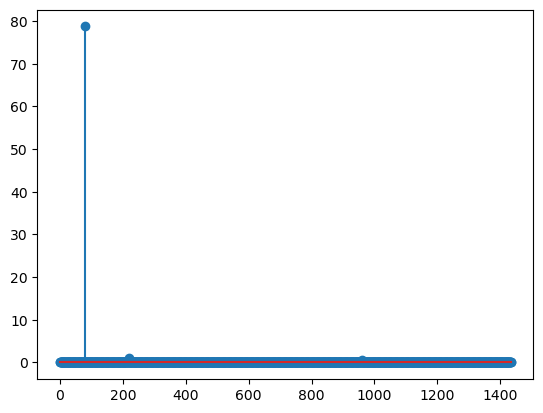

In [59]:
plt.stem(np.arange(len(toyota4)),np.round(cooks,4))

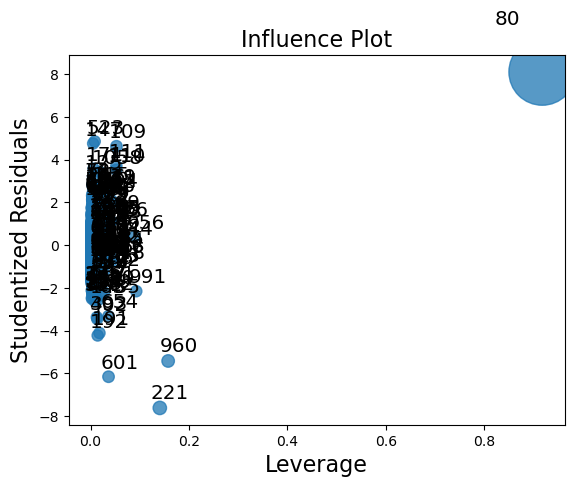

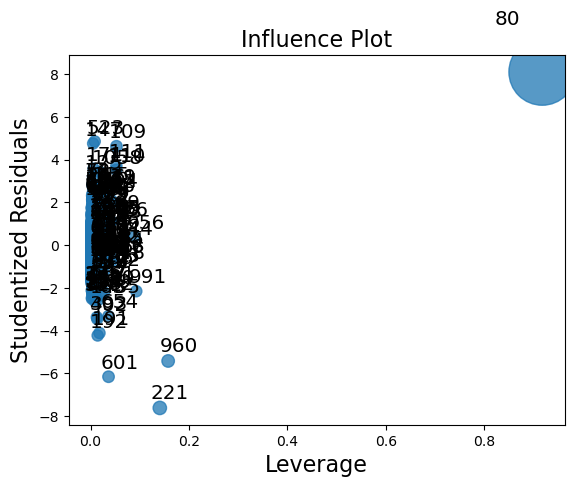

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)

In [63]:
toyota4.shape

(1435, 9)

In [64]:
k=9
n=1435

In [66]:
levarage_value= 3*(k+1)/n 

In [67]:
levarage_value

0.020905923344947737

In [69]:
toyota4[toyota4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [73]:
toyota5=toyota4.drop(toyota4.index[80],axis=0)

In [74]:
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [76]:
while model.rsquared<0.9:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)
        

NameError: name 'model' is not defined

In [84]:
while model1.rsquared < 0.90:
    for cooks in [np.max(cooks)>0.5]:
        model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
        (cooks,_)=model1.get_influence().cooks_distance
        cooks
        np.argmax(cooks) , np.max(cooks)
        toyota5=toyota5.drop(toyota5.index[[np.argmax(cooks)]],axis=0).reset_index(drop=True)
        toyota5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741537
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [85]:
startup=pd.read_csv(r"C:\Users\chana\Downloads\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [95]:
startup2=startup.rename({'R&D Spend':'R_D','Marketing Spend':'Marketing'},axis=1)


In [96]:
startup2

,R_D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [86]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [88]:
startup.duplicated().sum()

0

In [97]:
startup2.corr()

,R_D,Administration,Marketing,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [98]:
startup_model1=smf.ols('Profit~R_D+Administration+Marketing',data=startup2).fit()

In [100]:
startup_model1.pvalues.round(4)

Intercept         0.0000
R_D               0.0000
Administration    0.6018
Marketing         0.1047
dtype: float64

In [101]:
model_admin=smf.ols('Profit~Administration',data=startup2).fit()

In [102]:
model_admin.pvalues   # admin is insignificant

Intercept         0.003824
Administration    0.162217
dtype: float64

In [103]:
model_mark=smf.ols('Profit~Marketing',data=startup2).fit()

In [107]:
model_mark.pvalues.round(4)

Intercept    0.0
Marketing    0.0
dtype: float64

In [108]:
# lets check collinearity with vif

In [109]:
R_D_r2=smf.ols('R_D~Administration+Marketing',data=startup2).fit().rsquared

In [110]:
vif(R_D_r2)

2.4689030699947017

In [111]:
Admin_R2=smf.ols('Administration~R_D+Marketing',data=startup2).fit().rsquared

In [112]:
vif(Admin_R2)

1.1750910070550453

In [114]:
Mar_R2=smf.ols('Marketing~R_D+Administration',data=startup2).fit().rsquared

In [115]:
vif(Mar_R2)

2.326773290530878

In [116]:
# none of vir is more than 20 so no collinearity

In [117]:
# lets calculate cooks distance 

In [118]:
c,diff=startup_model1.get_influence().cooks_distance

In [119]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [120]:
from statsmodels.graphics.regressionplots import influence_plot

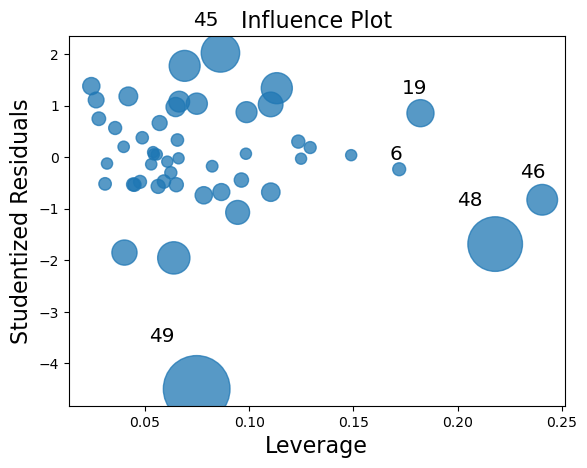

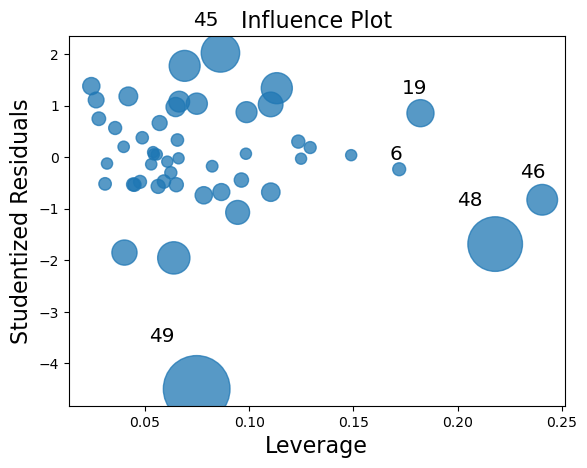

In [121]:
influence_plot(startup_model1)

In [123]:
startup2.shape

(50, 5)

In [130]:
n=50
k=5

In [131]:
lebarage_value=3*(k+1)/n

In [132]:
lebarage_value

0.36

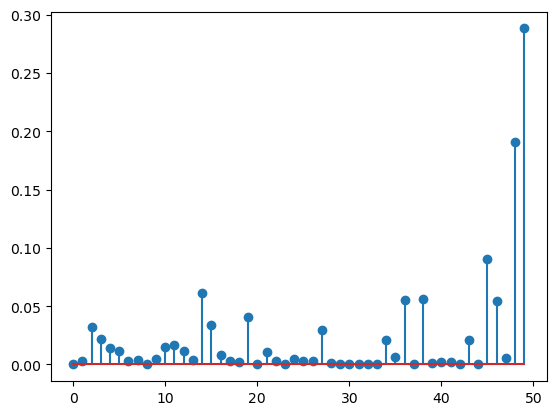

In [133]:
plt.stem(np.arange(len(startup2)),np.round(c,4))
plt.show()

In [134]:
np.argmax(c),np.max(c)

(49, 0.2880822927543264)

In [136]:
startup2[startup2.index.isin([49])]

,R_D,Administration,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [138]:
startup3=startup2.drop(startup2.index[[49]],axis=0)

In [140]:
startup3.shape

(49, 5)

In [141]:
startup_model1.rsquared

0.9507459940683246

In [146]:
while np.max(c)>0.5:
    model=smf.ols('Profit~R_D+Administration+Marketing',data=startup3).fit()
    (c,diff)=model.get_influence().cooks_distance
    startup3=startup3.drop(startup3.index[[np.argmax(c)]],axis=0)
else:
    final_model=smf.ols("Profit~R_D+Administration+Marketing",data=startup3).fit()
    print("Thus model accuracy is improved to",final_model.rsquared)
        
        
    

Thus model accuracy is improved to 0.9613162435129847


In [147]:
np.max(c)

0.2880822927543264